### Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Obtain the Location
* For example the engineering building of Bilbao: BIZ-Leioa > Biblioteca > P0, P1, P2, P3, P4, P5 Y P6.

In [13]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_DATOS
df1_location = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_DATOS.csv")

# Make a copy
df_location = df1_location.copy()

# Extract from CSV file the 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2' to obtain 'ap_name'
# 1st drop unnnecesary data
df_location.drop(labels=["id","ip_address","ip_type","type","vendor","avg_session_throughput","troughput", "interface",
"ap_mac_address","ap_ip_address","ssid","vlan","protocol","status","on_network","association_time","session_length",
"first_seen","traffic","encryption_cipher","rssi","snr","802_11u_client"], axis=1, inplace=True)

# 2nd stay only with data that 'location' = 'BIZ-Leioa > Biblioteca > P0,1,2,3,4,5,6'
df_location = df_location[(df_location["location"] == 'BIZ-Leioa > Biblioteca > P0') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P1') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P2') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P3') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P4') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P5') |
(df_location["location"] == 'BIZ-Leioa > Biblioteca > P6')]

# Show dataframe
df_location

,location,ap_name
43,BIZ-Leioa > Biblioteca > P5,AP-Biblioteca-1142-U014969
57,BIZ-Leioa > Biblioteca > P6,AP-Biblioteca-1142-U017953
90,BIZ-Leioa > Biblioteca > P1,AP-Biblioteca-1602-U022170
139,BIZ-Leioa > Biblioteca > P5,AP-Biblioteca-1602-U022183
155,BIZ-Leioa > Biblioteca > P4,AP-Biblioteca-1602-U022177
...,...,...
69696,BIZ-Leioa > Biblioteca > P0,AP-Biblioteca-1602-U022167
69701,BIZ-Leioa > Biblioteca > P5,AP-Biblioteca-1142-U014953
69716,BIZ-Leioa > Biblioteca > P0,AP-Biblioteca-1602-U022166
69756,BIZ-Leioa > Biblioteca > P1,AP-Biblioteca-1602-U022170


### Obtain with the 'ap_name' the 'suma_troghput' & 'cuenta_de_ip_address' 

In [14]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv
df1_ap = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv")

# Make a copy
df_ap = df1_ap.copy()

# Extract from CSV file the 'etiquetas_de_fila' of the df_location['ap_name']
# 1st save data of df_location['ap_name']
ap_name = df_location['ap_name']

# 2nd stay only the data of the 'ap_name'
df_ap_filter = df_ap[df_ap["etiquetas_de_fila"].isin(ap_name)]

# Show dataframe filter
df_ap_filter


,etiquetas_de_fila,suma_de_troughput,cuenta_de_ip_address
140,AP-Biblioteca-1142-U014953,"5365,1",19.0
141,AP-Biblioteca-1142-U014969,"41254,7",61.0
142,AP-Biblioteca-1142-U016978,"7291,9",58.0
143,AP-Biblioteca-1142-U017953,36526,49.0
144,AP-Biblioteca-1142-U018920,12299,74.0
145,AP-Biblioteca-1262-U018787,"13253,9",62.0
146,AP-Biblioteca-1262-U021951,"12621,9",13.0
147,AP-Biblioteca-1602-U022166,"21796,9",53.0
148,AP-Biblioteca-1602-U022167,"1670,7",18.0
149,AP-Biblioteca-1602-U022168,"3172,4",21.0


### Drop the unnecsary data

In [15]:
df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)

# Convert String to float of df_ap_filter['suma_de_troughput'] column
# Replace ',' of the String to be able to convert to Float
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].astype(float)

# Show info of dataframe
df_ap_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 140 to 176
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   suma_de_troughput     37 non-null     float64
 1   cuenta_de_ip_address  37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes


C:\Users\alvar\AppData\Local\Temp\ipykernel_5044\32999323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_5044\32999323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
C:\Users\alvar\AppData\Local\Temp\ipykernel_5044\32999323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

### Elbow method

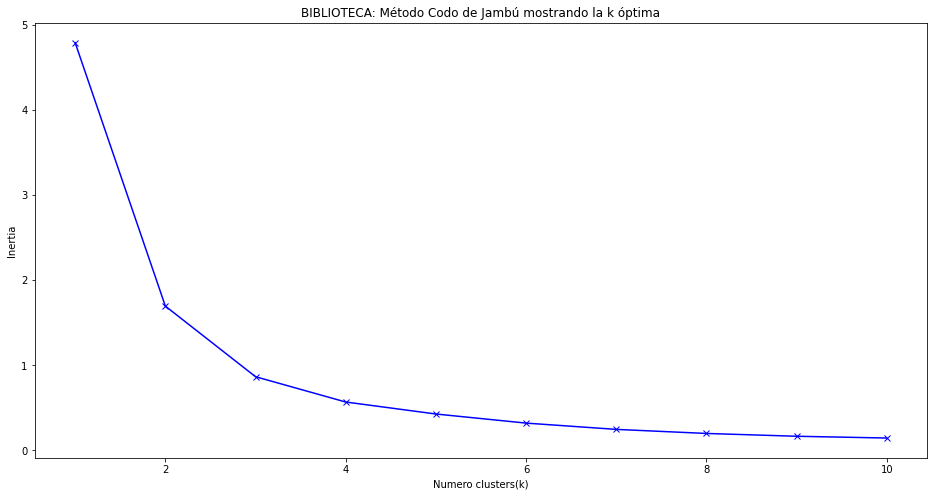

In [16]:
# Normalize data
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
normalize = min_max_scaler.fit_transform(df_ap_filter)
df_normalize = pd.DataFrame(normalize)

# Rename columns of data frame normalize
df_normalize = df_normalize.rename(columns={0: 'total_devices', 1: 'bw_busy'}) #I change the name of the columns to be the same as in the data of Dublin

# Elbow method
inertia = [] 
rango = range(1,11)
for i in rango:
    algoritmo = KMeans(n_clusters=i) #default: init = k-means++, n_init = 10, max_iter = 300
    algoritmo.fit(df_normalize)
    inertia.append(algoritmo.inertia_) #Calculate: The total sum of the square inside each cluster

# Size figure
plt.figure(figsize=(16,8))

# Plot
plt.plot(rango, inertia, 'bx-')
plt.xlabel('Numero clusters(k)')
plt.ylabel('Inertia')
plt.title('BIBLIOTECA: Método Codo de Jambú mostrando la k óptima')

# Print plt
plt.show()

### k-means from sklearn
* With the Elbow method we obtain the optimal k is 3

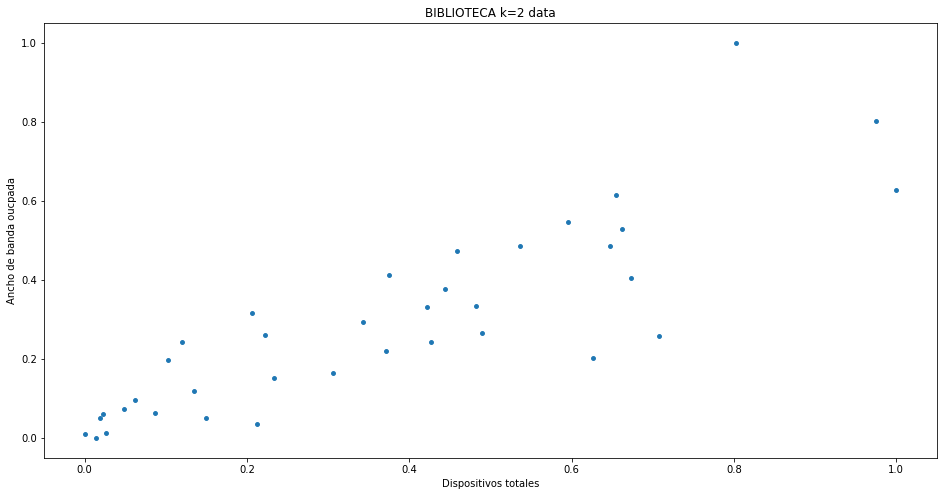

In [17]:
# Show k-means k=2
# Number of clusters
k = 2

# Kmeans
kmeans = KMeans(n_clusters= k) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster_kdos = kmeans.fit_predict(df_normalize)
df_normalize['cluster'] = cluster_kdos

# Obtain centroids coordinates
centroids = kmeans.cluster_centers_

# Asign x and y
x = df_normalize['total_devices'].values
y = df_normalize['bw_busy'].values

# Print result
plt.figure(figsize=(16,8))
plt.title('BIBLIOTECA k=2 data')
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x,y, marker='.', s=60)

### Graphic representation of k-means clusters

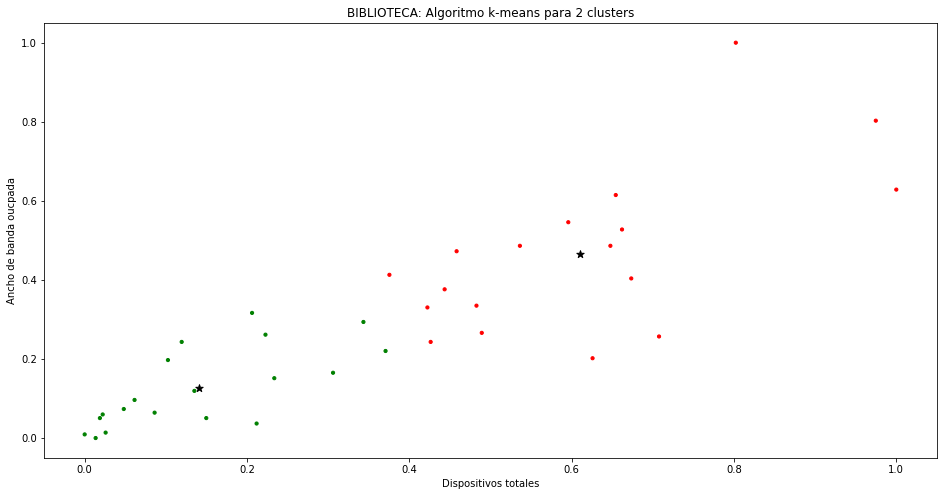

In [18]:
# Asign colors to clusters
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster_kdos:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(16,8))

# Plot scatter
plt.scatter(x, y, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('BIBLIOTECA: Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()

In [19]:
# Show info of cluster
copy_kdos = pd.DataFrame()
copy_kdos['bw_busy']=df_normalize['bw_busy'].values
copy_kdos['total_devices']=df_normalize['total_devices'].values
copy_kdos['cluster'] = df_normalize['cluster'].values
cantidadGrupo_kdos =  pd.DataFrame()
cantidadGrupo_kdos['cantidad']=copy_kdos.groupby('cluster').size()
cantidadGrupo_kdos

,cantidad
cluster,
0,18
1,19


### k-means now for K = 3

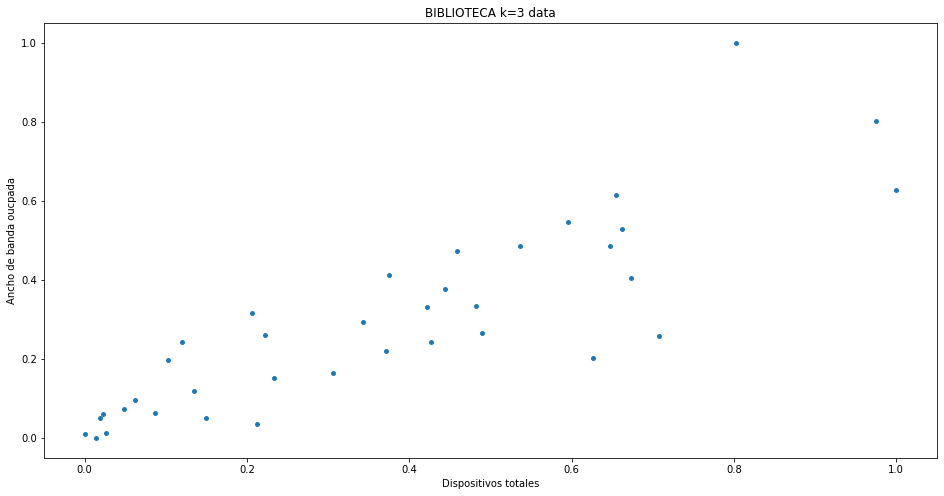

In [20]:
# Number of clusters
k = 3

# Kmeans
kmeans = KMeans(n_clusters= k) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster = kmeans.fit_predict(df_normalize)
df_normalize['cluster'] = cluster

# Obtain centroids coordinates
centroids = kmeans.cluster_centers_

# Asign x and y
x = df_normalize['total_devices'].values
y = df_normalize['bw_busy'].values

# Print result
plt.figure(figsize=(16,8))
plt.title('BIBLIOTECA k=3 data')
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x,y, marker='.', s=60)

### Graphic represnetation of K-means clusters

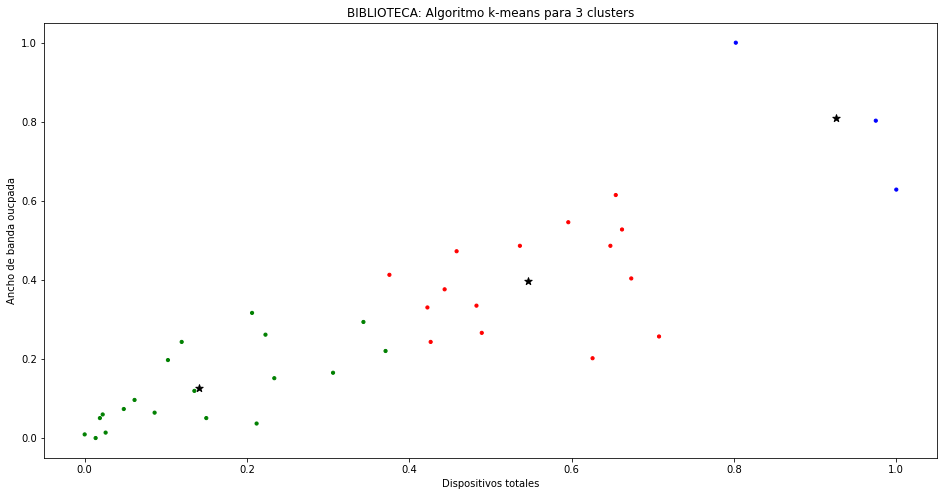

In [21]:
# Asign colors to clusters
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(16,8))

# Plot scatter
plt.scatter(x, y, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('BIBLIOTECA: Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()

In [22]:
# Show info of cluster
copy = pd.DataFrame()
copy['bw_busy']=df_normalize['bw_busy'].values
copy['total_devices']=df_normalize['total_devices'].values
copy['cluster'] = df_normalize['cluster'].values
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('cluster').size()
cantidadGrupo

,cantidad
cluster,
0,15
1,19
2,3
